# Linear Regression 線形回帰
Boston house price dataset

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
%matplotlib inline

## Boston house price dataset

### データセット作成

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape
y.shape

(506, 13)

(506,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [39]:
y_train.shape
y_test.shape

(339,)

(167,)

### データの標準化

データを平均0, 標準偏差1に標準化すると結果が安定<br>
テストデータには訓練データでfitしたscalerを適応

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)
y_train.shape
y_test.shape

(339, 1, 1)

(167, 1, 1)

### モデルを構築

In [30]:
import torch
import torch.nn as nn

# hyper parameters
input_size = 13
output_size = 1
num_epochs = 5000
learning_rate = 0.01

In [43]:
# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [44]:
model = LinearRegression(input_size, output_size)
model

LinearRegression(
  (linear): Linear(in_features=13, out_features=1, bias=True)
)

### LOSSとOptimizer
-  評価は平均二乗誤差
- Adam(Adaptive moment estimation)

In [47]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [48]:
criterion
optimizer

MSELoss()

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

### 訓練
- 200epochごとにログの出力
- train()とvalid()をそれぞれ関数として独立

In [53]:
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

In [54]:
def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).float()
    
    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    return val_loss.item()

In [55]:
# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    # data shuffle
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]

    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 200 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

epoch 0, loss: 581.5745 val_loss: 394.5944
epoch 200, loss: 85.6542 val_loss: 100.9936
epoch 400, loss: 82.3213 val_loss: 96.6926
epoch 600, loss: 81.5974 val_loss: 95.6814
epoch 800, loss: 81.3130 val_loss: 95.3300
epoch 1000, loss: 81.1233 val_loss: 95.1299
epoch 1200, loss: 80.9883 val_loss: 94.9915
epoch 1400, loss: 80.8932 val_loss: 94.8897
epoch 1600, loss: 80.8256 val_loss: 94.8126
epoch 1800, loss: 80.7757 val_loss: 94.7520
epoch 2000, loss: 80.7360 val_loss: 94.7016
epoch 2200, loss: 80.7012 val_loss: 94.6571
epoch 2400, loss: 80.6681 val_loss: 94.6154
epoch 2600, loss: 80.6351 val_loss: 94.5748
epoch 2800, loss: 80.6014 val_loss: 94.5344
epoch 3000, loss: 80.5669 val_loss: 94.4939
epoch 3200, loss: 80.5430 val_loss: 94.4531
epoch 3400, loss: 80.5025 val_loss: 94.4200
epoch 3600, loss: 80.4738 val_loss: 94.3875
epoch 3800, loss: 80.5079 val_loss: 94.4860
epoch 4000, loss: 80.4223 val_loss: 94.3304
epoch 4200, loss: 80.3991 val_loss: 94.3049
epoch 4400, loss: 80.3772 val_loss: 

### 実行結果

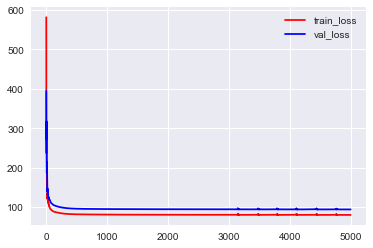

In [56]:
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()